<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/ModelWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPARATION**

In this exercise, we'll look at how to prepare our dataset before we feed our dataset to ML algorithms.

It is necessary to do this step, so that ML algorithms can generate a training model that is insensitive to outliers or any other anomalies in our input dataset.

**Step-1: Import necessities and Read the dataset**

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

#uploaded=files.upload()
#df = pd.read_csv(io.StringIO(uploaded['bank-2.csv'].decode('utf-8')))
url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank.csv'
df = pd.read_csv(url_train)

Check our dataset, first and last few rows

In [8]:
df.head(5)
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


**Step-2: Check the count of missing values**

In [9]:
df.isna().sum() #Sum or add up the no. of missing values for each column in the dataset.

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

We can see that, **poutcome, contact, education, job and age** have missing values out of which poutcome, contact and education have the highest number of missing values.

In [10]:
df_backup = df #Backing up original dataset before we do any data preprocessing.
df_backup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


Can we drop any columns that don't add any significance to make predictions sucah as ID, etc. from our dataset?

No, from an overview we do not have any columns such as ID in our dataset and we cannot remove any other columns with mere assumptions about their significance.

**Step-3: ENCODING CATEGORICAL ATTRIBUTE VALUES**


> **Encoding Ordinal Categorical Attributes**

What do we mean by Ordinal?


> Ordinal means any specific order in the subject under examination. Let's say the number system is ordinal. This is because there is a particular order to it (ascending order 1<2<3<4<5........).





In our dataset, do we have any ordinal categorical attributes?

Yes, a close look at the dataset reveals the **month** column to be ordinal. 

Why is it so? 

Think of it this way -> Jan<Feb<Mar<Apr......<Dec

Let's convert these values to numerical values as below,

Jan - 1, Feb - 2, Mar - 3, Apr - 4 , ......., Dec - 12

In [0]:
month_mapper =  {
    "jan" : 1,
    "feb" : 2,
    "mar" : 3,
    "apr" : 4,
    "may" : 5,
    "jun" : 6,
    "jul" : 7,
    "aug" : 8,
    "sep" : 9,
    "oct" : 10,
    "nov" : 11,
    "dec" : 12
} # Mapping months with numbers

df["month"] = df["month"].replace(month_mapper) #Apply our custom mapping to the dataset.

In [12]:
df.tail(10) #Checking if the mapping is applied correctly

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,9,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,9,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,9,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,9,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,9,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


Months are cyclic in nature.

We have Jan-Dec, and again after Dec, Jan starts. This cyclic behavior can be taken into account to add more accuracy.

>Idea from - 
*   https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db
*   http://blog.davidkaleko.com/feature-engineering-cyclical-features.html
*   https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning





In [13]:
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12)) #Shifting month value down by 1 for convenience so that we have 0-11 range.
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12)) #Shifting month value down by 1 for convenience so that we have 0-11 range.
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,month_sin,month_cos
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no,1.0,6.123234e-17
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no,1.0,6.123234e-17
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no,1.0,6.123234e-17
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no,1.0,6.123234e-17
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no,1.0,6.123234e-17


Now that we have the cyclic nature of months available in place as a feature, or attribute, we can drop the actual month column.

In [14]:
df.drop('month', axis=1, inplace=True)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed,month_sin,month_cos
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,327,2,-1,0,NaN,yes,-0.866025,-0.5
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,1334,2,-1,0,NaN,yes,-0.866025,-0.5
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,231,1,-1,0,NaN,yes,-0.866025,-0.5
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,185,1,-1,0,NaN,yes,-0.866025,-0.5
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,208,2,-1,0,NaN,yes,-0.866025,-0.5


> **One Hot Encoding other categorical/nominal attributes**




In [15]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'education', 'contact', 'poutcome'], dummy_na=True, drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed,month_sin,month_cos,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,327,2,-1,0,yes,-0.866025,-0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,1334,2,-1,0,yes,-0.866025,-0.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,231,1,-1,0,yes,-0.866025,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,185,1,-1,0,yes,-0.866025,-0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1999,40.0,married,no,6403,no,no,22,208,2,-1,0,yes,-0.866025,-0.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


We can see that there is a separate column created for features with NaN value.

Time to encode, other categorical attribute values that do not have any missing values.

In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,month_sin,month_cos,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,392,1,957,2,131,2,1.0,6.123234e-17,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,688,1,233,2,133,1,1.0,6.123234e-17,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,1035,1,126,2,239,1,1.0,6.123234e-17,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,398,1,274,1,238,2,1.0,6.123234e-17,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,1004,1,479,1,307,1,1.0,6.123234e-17,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


We can see that columns like married, are encoded by splitting them into columns with attribute values as the column name (e.g. married_single, etc.), and the value would be 1 or 0 depending on the actual attribute value.

**Step-4: CLEANSING MISSING NUMERIC VALUES**

In [17]:
df.isna().sum() #Sum the attributes with NaN or missing values, and display it

age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
month_sin               0
month_cos               0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

Only the attribute **age** has missing values.


How do we determine or compute missing age values?
> *   Simplest way is to compute mean of all ages, and fill it in for missing values. But this can induce bias to our dataset, as the mean might be skewed depending on the age range collected in our dataset.
*   Another simpler way is to find the median of the ages present in our dataset and apply it for the missing values.




Lets check out the median age of our dataset.



In [18]:
df["age"].median()

38.0

But upon a thorough examination of the dataset, there are records where records with missing values are of students, and filling in 38, the median age for such records would not be appropriate we believe.

How about, finding attributes that might help us get an estimate of the age?

In [19]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,month_sin,month_cos,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,392,1,957,2,131,2,1.0,6.123234e-17,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,688,1,233,2,133,1,1.0,6.123234e-17,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,1035,1,126,2,239,1,1.0,6.123234e-17,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,398,1,274,1,238,2,1.0,6.123234e-17,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,1004,1,479,1,307,1,1.0,6.123234e-17,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


>Upon examining the dataset again, we believe or assume that marital_single (married or not) and job_student (Student or not) can be good indicators for age of a person.

A boxplot of these attributes can help us understand if they are good indicators.

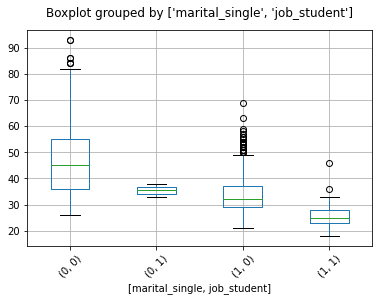

In [20]:
df.boxplot(column='age', by=['marital_single','job_student'], rot=45)
plt.title("")
plt.show()

>There is significant variation in the medians, and these look like good indicators to fill in the missing age values.

Let's get a pivot table for these attributes which has the median for these groupings.

In [21]:
pvtable = df.pivot_table(values='age', index='job_student', columns='marital_single', aggfunc=np.median) #Compute median age, for these 2 groups.
pvtable

marital_single,0,1
job_student,,
0,45.0,32.0
1,35.5,25.0


Let's write a function, that returns this median value, and we use this function to fill in for the missing age values.

In [0]:
# Define function to return the median age from our pivot table
def get_age(x):
    return pvtable.loc[x['job_student'], x['marital_single']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_age, axis=1), inplace=True)

Time to check, how our function has filled in the value.

In [23]:
df.iloc[1232] #Record which previously had a missing age value, now filled with value from our function

age                     25.000000
balance                431.000000
day                     19.000000
duration               418.000000
campaign                11.000000
pdays                  185.000000
previous                 5.000000
month_sin               -0.500000
month_cos               -0.866025
job_blue-collar          0.000000
job_entrepreneur         0.000000
job_housemaid            0.000000
job_management           0.000000
job_retired              0.000000
job_self-employed        0.000000
job_services             0.000000
job_student              1.000000
job_technician           0.000000
job_unemployed           0.000000
job_nan                  0.000000
education_secondary      1.000000
education_tertiary       0.000000
education_nan            0.000000
contact_telephone        0.000000
contact_nan              0.000000
poutcome_other           0.000000
poutcome_success         1.000000
poutcome_nan             0.000000
marital_married          0.000000
marital_single

**Step-5: SCALING/TRANSFORMING NUMERICAL VALUES**

First lets look at which columns have outlier values using boxplot.

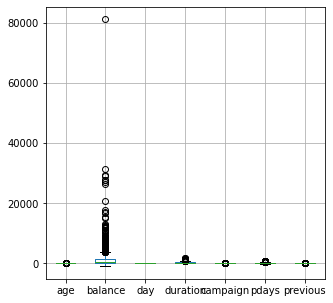

In [24]:
df.boxplot(column=['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous'], figsize=(5,5))

Closer look at each of the boxplots,

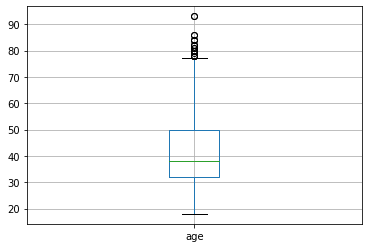

In [25]:
df.boxplot(column=['age'])

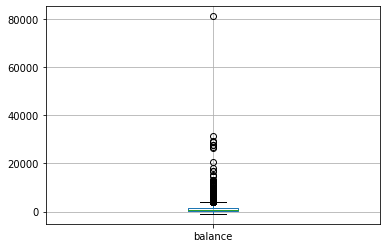

In [26]:
df.boxplot(column=['balance'])

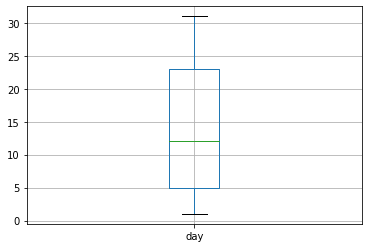

In [27]:
df.boxplot(column=['day']) #Doesn't have outliers

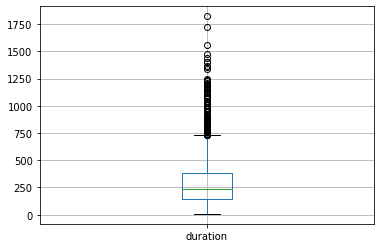

In [28]:
df.boxplot(column=['duration'])

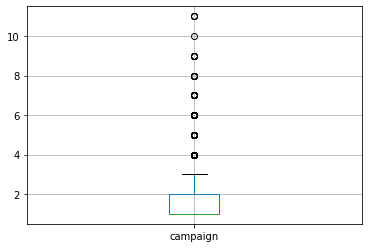

In [29]:
df.boxplot(column=['campaign'])

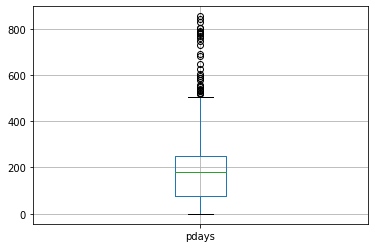

In [30]:
df.boxplot(column=['pdays'])

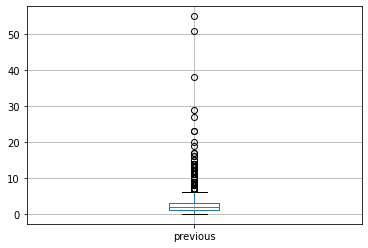

In [31]:
df.boxplot(column=['previous'])

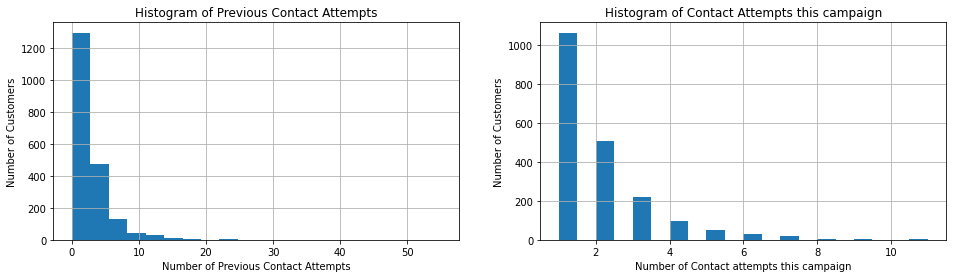

In [32]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Previous Contact Attempts
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Previous Contact Attempts")
ax1.set_xlabel('Number of Previous Contact Attempts')
ax1.set_ylabel('Number of Customers')
df['previous'].hist(bins=20)

# Plot Contact Attempts in this Campaign
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Contact Attempts this campaign")
ax3.set_xlabel('Number of Contact attempts this campaign')
ax3.set_ylabel('Number of Customers')
df['campaign'].hist(bins=20)

plt.show()

From the above histogram, it can be seen that the attribute previous is left skewed, with almost no values towards the right.

Apart from day, remaining numeric attributes have outliers, and we'll apply RobustScaler which is better in terms of handling outliers compared to the MinMax and StandardScaler.

We can also scale campaign separately as it is ordinal ranging fom 1-11.

In [0]:
robust_scaler = RobustScaler()
df[['balance', 'pdays']] = robust_scaler.fit_transform(df[['balance', 'pdays']])

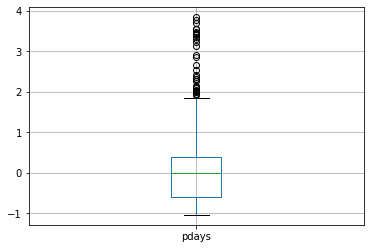

In [34]:
df.boxplot(column="pdays") #After applying RobustScaler

To bring the column **campaign** to the interval $[0,1]$, we divide it by 11 as the values range from 1-11 

In [0]:
df["campaign"] = df["campaign"]/11

**Step-6: HANDLING OUTLIERS**

From the above box plots, **balance** and **pdays** have high number of outliers. First we'll handle them and look at the remaining columns in a while.

Let us see their histgrams first after we have rescaled them.

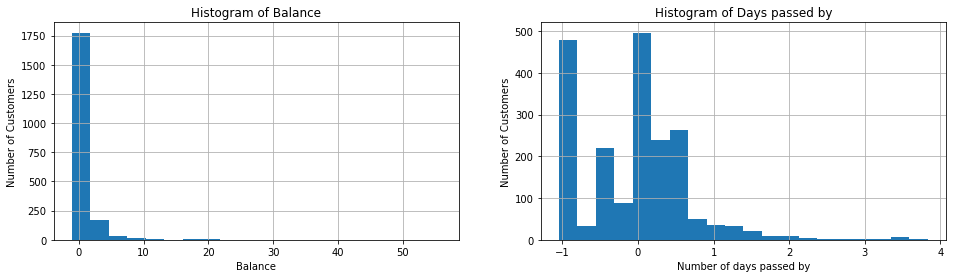

In [36]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Plot Days passed by from previous contact
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Days passed by")
ax3.set_xlabel('Number of days passed by')
ax3.set_ylabel('Number of Customers')
df['pdays'].hist(bins=20)

plt.show()

From the histogram, the data is skewed towards left which is undesirable.

For ML algorithms to work efficiently, the data must not be skewed towards either side.

Let us look at the minimum values for these attributes before working with them.

In [37]:
df[['balance', 'pdays']].min()

balance   -1.060984
pdays     -1.044223
dtype: float64

Both the columns have negative values after transforming, and it is necessary to apply a positive constant when we use a log transformation to transform these values.

We are using a log transformation to consider the possibility of higher values as well, which needs to be considered when choosing ML models. We would shift our values in the range of $[1, infinity]$

By doing so, we would be able to reduce the impact of outliers on our ML model.

In [0]:
df["balance"] = np.log(df["balance"]+2.26)
df["pdays"] = np.log(df["pdays"]+2.85)

Time to check how our transformation has worked.

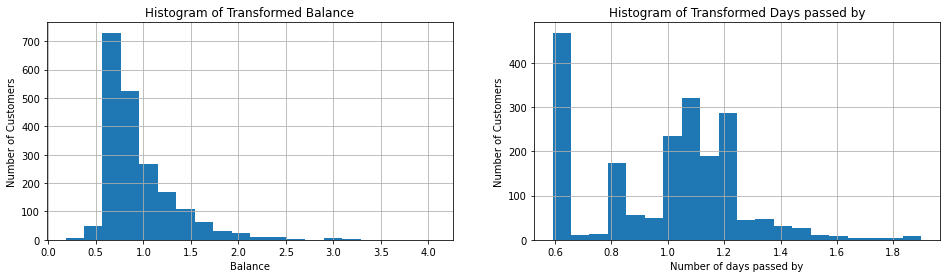

In [39]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Transformed Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Transformed Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Plot Transformed Days passed by from previous contact
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Transformed Days passed by")
ax3.set_xlabel('Number of days passed by')
ax3.set_ylabel('Number of Customers')
df['pdays'].hist(bins=20)

plt.show()

The transformation has slightly improved the skewness of our data, by moving it to the center slightly (i.e. towards the median).

Lets check the distribution of age which is ordinal.

In [40]:
df["age"].value_counts()
df["age"].max()

93.0

We divide the age values by their maximum which is nothing but **MinMax Scaling**

In [0]:
df["age"] = df["age"]/93

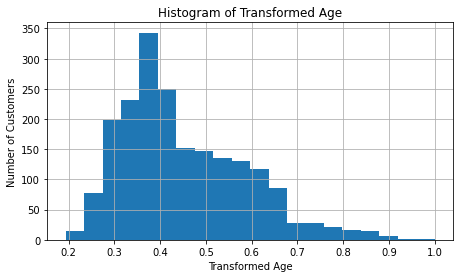

In [42]:
# Create figure
fig = plt.figure(figsize=(16,4))


# Plot Transformed Days passed by from previous contact
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Transformed Age")
ax3.set_xlabel('Transformed Age')
ax3.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

plt.show()

**Step-7: DERIVED FEATURE**

Feature derivation is nothing but combining two features of dataset, and seeing whether they can help make our datset better, and help for efficient training of an ML model.

In our dataset, we can see that there are 2 features **'previous'** and **'campaign'**



*   Previous is the number of times the client was contacted before this campaign.
*   Campaign is the number of times the client was contacted during this campaign.

>We can combine or add both of these to form a new feature called **'TotalContactAttempts'**



In [43]:
df['TotalContactAttempts'] = df_backup['previous'] + df_backup['campaign']
df[['TotalContactAttempts']] = robust_scaler.fit_transform(df[['TotalContactAttempts']])
df["TotalContactAttempts"].min()

-0.6666666666666666

Applying Log Transformation for the new derived feature, that was scaled as well.

In [0]:
df["TotalContactAttempts"] = np.log(df["TotalContactAttempts"]+1.67) #Adding Positive constant to smooth out the negative values

Let's plot out new feature and see how it has turned out after transformation

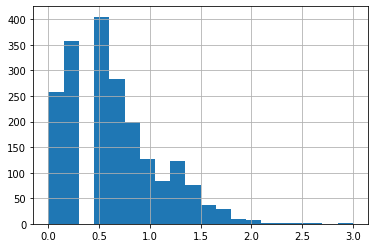

In [45]:
df["TotalContactAttempts"].hist(bins=20)

From the histogram we had plotted in step-5, the previous contact attempts was left skewed, and therefore we can drop this attribute, as we also have the derived feature TotalContactAttempts which is computed by adding both the previous and campaign attributes.

In [0]:
df.drop('previous', axis=1, inplace=True)

Save the transformed or preprocessed dataset.

In [0]:
df.to_csv('bank-2_prepared.csv')
files.download("bank-2_prepared.csv")